https://github.com/ACWI-SSWD/nldi-services

In [1]:
import requests

In [6]:
nldiURL = 'https://cida.usgs.gov/nldi'

In [10]:
QTypes = {'DM':'Downstream Main',
          'UM':'Upstream Main',
          'DD':'Downstream with Diversions',
          'UT':'Upstream with Tributaries'}

In [55]:
#User Values
f = 'huc12pp' #SourceType
e = 'DM' #QueryType
c = '180201251003' #ComIDField
d = '' #DistanceField

In [15]:
#Service URLs
wqpURL = "{}/{}/{}/{}/wqp".format(nldiURL,f,c,e)
huc12ppURL = "{}/{}/{}/navigate/{}/huc12pp".format(nldiURL,f,c,e)
nhdURL = "{}{}/{}/navigate/{}".format(nldiURL,f,c,e)
basinURL = "{}/{}/{}/basin".format(nldiURL,f,c,e) 

In [18]:
print(basinURL)

https://cida.usgs.gov/nldi/huc12pp/180201251003/basin


In [19]:
#Get the basin as geojson
rawResp = requests.get(basinURL)

In [21]:
j = rawResp.json()

In [22]:
j.keys()

dict_keys(['type', 'features'])

In [25]:
feats = j['features']
len(feats)

1

In [29]:
feat = feats[0]
feat.keys()

dict_keys(['type', 'geometry', 'properties'])

In [27]:
from geojson import MultiPolygon 

In [33]:
m = MultiPolygon(feats[0]['geometry']['coordinates'])

In [40]:
import geopandas as gpd
from geopandas import GeoSeries
from geopandas import GeoDataFrame

In [41]:
gSeries = GeoSeries(m)

In [44]:
%matplotlib inline

In [53]:
gdf = GeoDataFrame.from_features(feats)

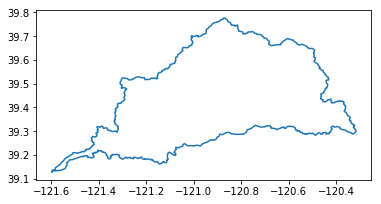

In [56]:
gdf.boundary.plot();